## **Visualizing Filtered Voronoi Polygons with Area-Based Coloring**

This code loads and visualizes the filtered Voronoi polygons from the GeoJSON file with area-dependent coloring.

### **Key Steps:**
1. **Loads GeoJSON data** 

2. **Converts to GeoDataFrame** using GeoPandas:
   - Extracts geometry from each GeoJSON feature using Shapely's `shape()` function
   - Preserves polygon properties including calculated areas
   - Sets coordinate reference system to EPSG:4326 (WGS84)

3. **Creates sequential colormap** with reversed "Blues" palette:
   - Dark colors → smaller area polygons
   - Light colors → larger area polygons
   - Uses `Normalize()` to map area values to colormap range [0,1]

4. **Generates thematic map** visualizing polygon areas:
   - Polygons colored by their calculated area values
   - Black outlines for clear polygon boundaries
   - Clean visualization with axes turned off
   - Saved as high-resolution PNG (300 DPI)

5. **Saves output** as `Meropis.png` with tight bounding box

### **Visual Features:**
- **Color mapping**: Area values drive polygon fill colors
- **Edge styling**: Consistent black borders for clarity
- **Layout**: Minimalist presentation with title only
- **Export**: High-quality image suitable for publication

### **Output:**
- Interactive matplotlib display in notebook
- PNG file saved to disk as `.png`
- Color-coded visualization showing area distribution patterns

/tmp/ipykernel_10132/343728886.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Blues_r")          # "_r" makes it reversed: small → dark, large → light


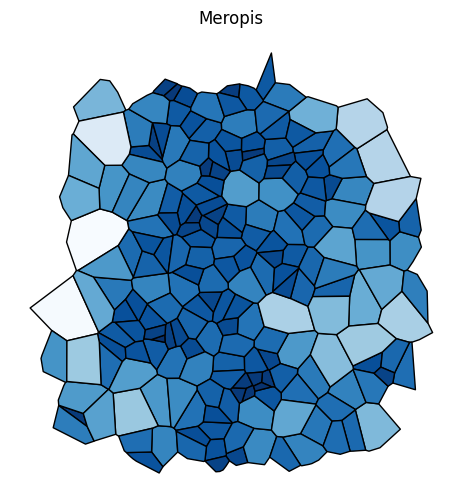

/tmp/ipykernel_10132/343728886.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_type = cm.get_cmap("Set1", 3)


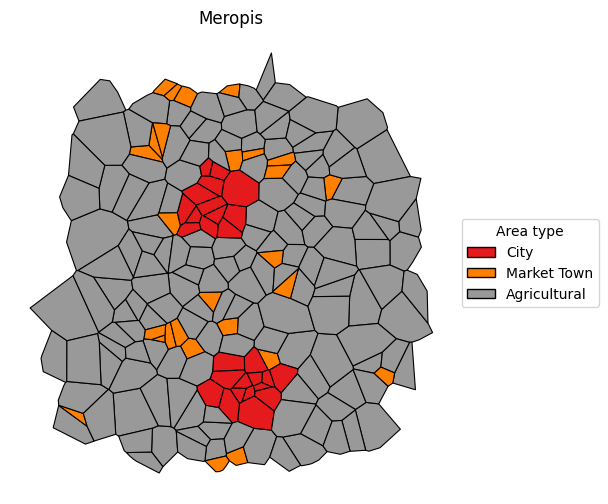

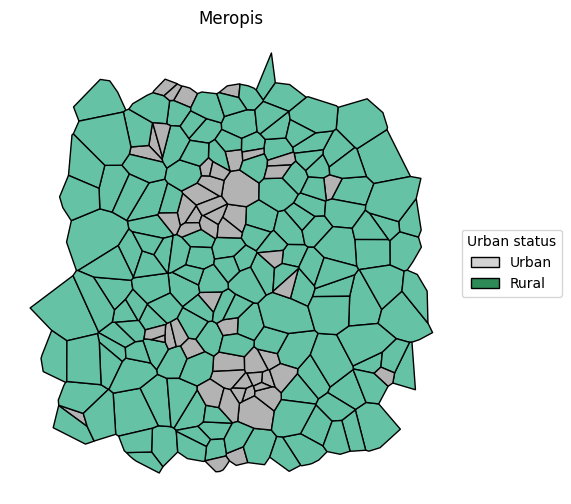

In [5]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import colormaps
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

# -------------------------------------------------
#   Load the GeoJSON file
# -------------------------------------------------
with open("bounded_polygons.geojson", "r", encoding="utf-8") as f:
    geojson_obj = json.load(f)

# -------------------------------------------------
#   Convert each feature to a Shapely geometry
# -------------------------------------------------
features = geojson_obj["features"]
records = []   # property dictionaries
geoms   = []   # Shapely geometry objects

for feat in features:
    geom = shape(feat["geometry"])
    geoms.append(geom)

    # Ensure the area is a float (just in case)
    props = feat["properties"].copy()
    props["area"] = float(props.get("area", 0))
    props["urban"]  = bool(props.get("urban", False))
    props["type"]   = str(props.get("type", ""))
    records.append(props)

# -------------------------------------------------
#   Build the GeoDataFrame
# -------------------------------------------------
gdf = gpd.GeoDataFrame(records, geometry=geoms, crs="EPSG:4326")

# -------------------------------------------------
#  Create a colormap that goes from dark → light
# -------------------------------------------------
# Choose a sequential colormap (e.g., "Blues") and reverse it
cmap = cm.get_cmap("Blues_r")          # "_r" makes it reversed: small → dark, large → light

# Normalise the area values to the range [0, 1] for the colormap
norm = mcolors.Normalize(vmin=gdf["area"].min(), vmax=gdf["area"].max())

# -------------------------------------------------
#   Plot the polygons, colouring by area
# -------------------------------------------------
ax = gdf.plot(
    column="area",          # tell GeoPandas which column drives the colour
    cmap=cmap,              # our dark‑to‑light colour map
    norm=norm,              # use the normaliser defined above
    edgecolor="black",
    linewidth=1,
    figsize=(6, 6),
    legend=False,            # optional: adds a colour bar legend
)

ax.set_title("Meropis")
ax.set_axis_off()

# Optional: save the figure
plt.savefig("Meropis1.png", dpi=300, bbox_inches="tight")

plt.show()

# -------------------------------------------------
#   Plot the polygons, colouring by area
# -------------------------------------------------

type_order = ["city", "market_town", "agricultural"]
gdf["type_cat"] = pd.Categorical(gdf["type"],
                                 categories=type_order,
                                 ordered=True)
cmap_type = cm.get_cmap("Set1", 3)
type_legend = [
    Patch(facecolor=cmap_type(i), edgecolor="black",
          label=typ.replace("_", " ").title())
    for i, typ in enumerate(type_order)
]


ax = gdf.plot(
    column="type_cat",          # categorical column created earlier
    cmap=cmap_type,            # e.g. colormaps.get_cmap("Set2")
    edgecolor="black",         # black polygon borders
    linewidth=0.8,             # thin but visible outline
    figsize=(6, 6),            # 6‑inch square figure
    legend=False,              # we'll build a manual legend afterwards
    # No `norm=` argument – not needed for categorical data
)

ax.legend(
    handles=type_legend,
    loc="center left",            # anchor point on the legend box
    bbox_to_anchor=(1.02, 0.5),   # (x, y) in axes fraction coordinates
    frameon=True,
    title="Area type",
    borderaxespad=0.0,            # no extra padding around the axes
)
ax.set_title("Meropis")
ax.set_axis_off()

# Optional: save the figure
plt.savefig("Meropis2.png", dpi=300, bbox_inches="tight")

plt.show()

# -------------------------------------------------
#   Plot the polygons, colouring by area
# -------------------------------------------------
cmap_urban = ListedColormap(["lightgray", "seagreen"])

# Encode the boolean as 0 / 1 so the colormap can be applied
gdf["urban_code"] = gdf["urban"].astype(int)

urban_legend = [
    Patch(facecolor="lightgray", edgecolor="black", label="Urban"),
    Patch(facecolor="seagreen", edgecolor="black", label="Rural")
]

cmap_type = colormaps.get_cmap("Set2") 
ax = gdf.plot(
    column="urban_code",          # tell GeoPandas which column drives the colour
    cmap=cmap_type,              # our dark‑to‑light colour map
    norm=norm,              # use the normaliser defined above
    edgecolor="black",
    linewidth=1,
    figsize=(6, 6),
    legend=False,            # optional: adds a colour bar legend
)


ax.legend(
    handles=urban_legend,
    loc="center left",            # anchor point on the legend box
    bbox_to_anchor=(1.02, 0.5),   # (x, y) in axes fraction coordinates
    frameon=True,
    title="Urban status",
    borderaxespad=0.0,            # no extra padding around the axes
)
ax.set_title("Meropis")
ax.set_axis_off()

# Optional: save the figure
plt.savefig("Meropis3.png", dpi=300, bbox_inches="tight")

plt.show()

In [2]:
def save_as_shape():
    output_path = "meropis.shp"
    gdf.to_file(output_path, driver="ESRI Shapefile")